# Introduction


A [fast-food chain](https://drive.google.com/file/d/1dQsnvaPOQ2zAsg8uc8UVhER7GIztrEW-/view?usp=sharing) plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.



Objective:


By this analysis, we would be using A/B testing to determine which promotional activity works best for the company.(in term of magnitude)

Features Explanation:


MarketID: unique identifier for market


MarketSize: size of market area by sales

LocationID: unique identifier for store location

AgeOfStore: age of store in years

Promotion: one of three promotions that were tested


week: one of four weeks when the promotions were run


SalesInThousands: sales amount for a specific LocationID, Promotion, and week

# Importing libraries and Loading the dataset

In this step, we will first import libraries and then load this educational dataset into the notebook.

In [64]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')
# ignore warnings
import warnings
warnings.simplefilter('ignore')

In [65]:
from google.colab import files
files.upload()


Saving WA_Marketing-Campaign.csv to WA_Marketing-Campaign (2).csv


{'WA_Marketing-Campaign.csv': b'MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands\r\n1,Medium,1,4,3,1,33.73\r\n1,Medium,1,4,3,2,35.67\r\n1,Medium,1,4,3,3,29.03\r\n1,Medium,1,4,3,4,39.25\r\n1,Medium,2,5,2,1,27.81\r\n1,Medium,2,5,2,2,34.67\r\n1,Medium,2,5,2,3,27.98\r\n1,Medium,2,5,2,4,27.72\r\n1,Medium,3,12,1,1,44.54\r\n1,Medium,3,12,1,2,37.94\r\n1,Medium,3,12,1,3,45.49\r\n1,Medium,3,12,1,4,34.75\r\n1,Medium,4,1,2,1,39.28\r\n1,Medium,4,1,2,2,39.8\r\n1,Medium,4,1,2,3,24.77\r\n1,Medium,4,1,2,4,30.98\r\n1,Medium,5,10,2,1,30.37\r\n1,Medium,5,10,2,2,24.82\r\n1,Medium,5,10,2,3,37.47\r\n1,Medium,5,10,2,4,23.35\r\n1,Medium,6,10,3,1,32.9\r\n1,Medium,6,10,3,2,22.18\r\n1,Medium,6,10,3,3,42.98\r\n1,Medium,6,10,3,4,26.68\r\n1,Medium,7,15,1,1,42.92\r\n1,Medium,7,15,1,2,42.16\r\n1,Medium,7,15,1,3,51.72\r\n1,Medium,7,15,1,4,36.17\r\n1,Medium,8,10,2,1,30.08\r\n1,Medium,8,10,2,2,28.62\r\n1,Medium,8,10,2,3,25.4\r\n1,Medium,8,10,2,4,27.26\r\n1,Medium,9,6,1,1,37.41\r\n1,Medium,9,6,1,2

In [66]:
# loading the file
df = pd.read_csv('WA_Marketing-Campaign.csv')

# Exploring the data

In this step,we will explore the dataset so as to determine or dig out some facts about it.

In [67]:
# look at the head
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [68]:
# look at the tail
df.tail()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29
547,10,Large,920,14,2,4,49.41


The above dataset shows the weekly sales of the firm in different stores belonging to different market size using different promotional techniques.

In [69]:
# number of rows and columns
print("The given dataset has {} number of rows and {} number of features.".format(df.shape[0],df.shape[1]))

The given dataset has 548 number of rows and 7 number of features.


In [70]:
# info : to get the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


There are all numerical variables except the marketID which has object datatype.


Also, it look like there are no null values (due to correct datatype of columns)

In [71]:
# describe about the variables
round(df.describe(),2)

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.00,548.00,548.00,548.00,548.00,548.00
mean,5.72,479.66,8.50,2.03,2.50,53.47
std,2.88,287.97,6.64,0.81,1.12,16.76
min,1.00,1.00,1.00,1.00,1.00,17.34
25%,3.00,216.00,4.00,1.00,1.75,42.54
50%,6.00,504.00,7.00,2.00,2.50,50.20
75%,8.00,708.00,12.00,3.00,3.25,60.48
max,10.00,920.00,28.00,3.00,4.00,99.65


In [72]:
# knowlegde about the object variable
df['MarketSize'].value_counts()

Medium    320
Large     168
Small      60
Name: MarketSize, dtype: int64

* On average , sales are 53 thousands dollars. If we look at the way sales changes(from min to 100%) there appears to be les number of outliers in it.

* Age of stores lies between 1 and 28 with average age of 8 years.



* About 60 percent of the markets are of medium size. Also there are about 90 percent of market are non-small (medium+ large).




In [73]:
# number of unique values in each feature
df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

In [74]:
# unique values
for x in df.columns:
  if x != 'SalesInThousands':
    print("The unique values of {} are {}".format(x,pd.unique(df[x])))

The unique values of MarketID are [ 1  2  3  4  5  6  7  8  9 10]
The unique values of MarketSize are ['Medium' 'Small' 'Large']
The unique values of LocationID are [  1   2   3   4   5   6   7   8   9  10  11  12  13 101 102 103 104 105
 106 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 301 302 303 304 305 306 307 308 309 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 601 602 603 604 605 606 607 608 609 610
 611 612 613 614 615 701 702 703 704 705 706 707 708 709 710 711 712 801
 802 803 804 805 806 807 808 809 810 901 902 903 904 905 906 907 908 909
 910 911 912 913 914 915 916 917 918 919 920]
The unique values of AgeOfStore are [ 4  5 12  1 10 15  6 22  8 19 11 13  3  7  2 23  9 28 25 14 24 18 27 17
 20]
The unique values of Promotion are [3 2 1]
The unique values of week are [1 2 3 4]


* There are 10 markets (1 to 10)
* There are four weeks for promotion (1,2,3,4)


Now, we will check the correlation between various features

In [75]:
# using corr method of pandas
round(df.corr(),2)

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
MarketID,1.00,1.00,-0.05,-0.05,-0.00,-0.19
LocationID,1.00,1.00,-0.05,-0.05,-0.00,-0.19
AgeOfStore,-0.05,-0.05,1.00,0.06,0.00,-0.03
Promotion,-0.05,-0.05,0.06,1.00,0.00,-0.06
week,-0.00,-0.00,0.00,0.00,1.00,-0.01
SalesInThousands,-0.19,-0.19,-0.03,-0.06,-0.01,1.00


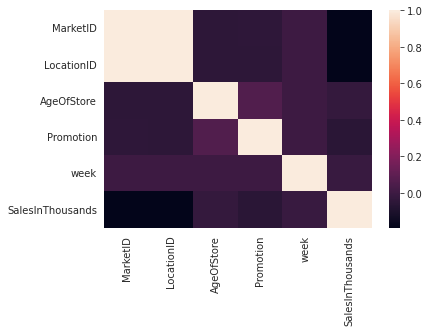

In [76]:
# using seaborn method
correl = df.corr()
sns.heatmap(correl)

Insights about the correlation:


There seems to be lack of correlation in the numerical variables (that is either quite low postive correlation or low negative correlation.

Promotion wise :


We will explore the dataset on the basis of promotion, that is how sales vary based on the promotion chosen.

Text(0.5, 1.0, 'Number of sales per promotion')

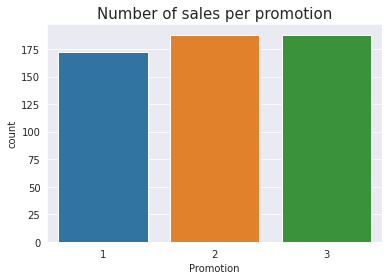

In [77]:
# NUMBER OF SALES OF DIFFERENT PROMOTIONS
sns.countplot(df['Promotion'])
plt.title("Number of sales per promotion",fontsize=15)

Text(0.5, 1.0, 'Sales per promotion')

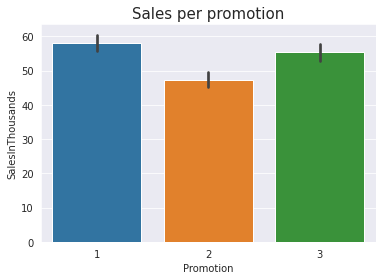

In [78]:
# average sales of each promotion
sns.barplot(df['Promotion'],df['SalesInThousands'])
plt.title("Sales per promotion",fontsize=15)

Insights

1. Although there are more number of sales from promotion_2, yet it accounst for a less amount of sales on average.
2. Sales from promotion_1 and promotion_3 are virtually same (overall).

# A/A test

A/A test is a test of presence of randomness in the sample. On the basis of these tests, we can find whether it is good to go ahead and conduct A/B testing or not.
 Now,we will conduct the A/A test to know whether the sales in thousands are of random nature or not.

In [79]:
# create a rand value using numpy rand
x= np.random.rand()
rand_val =[]
for y in df['SalesInThousands']:
  rand_val.append(np.random.rand())
df['rand1or0']  = rand_val

In [80]:
# taking two group of values
less_than_05 = df[df['rand1or0']<=0.5]['SalesInThousands']
more_than_05 = df[df['rand1or0']>0.5]['SalesInThousands']

In [81]:
# checking the p-value and t-statistics
from scipy.stats import ttest_ind
res = ttest_ind(less_than_05,more_than_05)
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("there is a significance difference in two samples implying that there is a presence of bias in these samples")
else:
  print("There is no difference in these samples which implies the samples are unbiased and hence, of random nature.") 

There is no difference in these samples which implies the samples are unbiased and hence, of random nature.


From the above A/A test, we found out that the samples of sales is of random nature which suggests that the A/B testing done on these samples would be authentic and result-yielding.

# A/ B testing

Now, we are aware that our samples are of random nature. Thanks to this, we will now conduct A/B test to know which promotion line works best for the firm.


Through A/ B testing, we would like to answer the following questions:


1. How promotion affects the sales of a market based on its size (that is how same size market works in different promotion channel)


2. How promotion affects the market based on week, that is which promotion works based in each week.
3. How promotion impacts the sales based on age of store.
4. which promotion performs well over others when we compare it over location wise.

## 1.  How promotion affects the sales of a market based on its size (that is how same size market works in different promotion channel)


In this , we will first see which promotions are having a touch competition in sales when compared marketwise. Then based on it, we will see how  we will conduct the hypothesis testing.



In [82]:
# size wise 
small_sales = df[df['MarketSize']=='Small'][['SalesInThousands','Promotion']]
med_sales = df[df['MarketSize']=='Medium'][['SalesInThousands','Promotion']]
lar_sales  = df[df['MarketSize']=='Large'][['SalesInThousands','Promotion']]

Text(0.5, 1.0, 'Small Size Firm Sales')

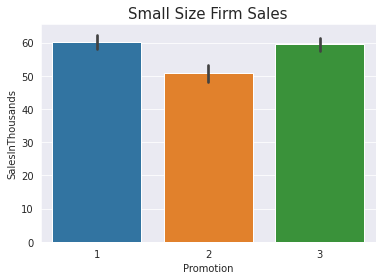

In [83]:
# barplot 
sns.barplot(small_sales['Promotion'],small_sales['SalesInThousands'])
plt.title("Small Size Firm Sales", fontsize=15)

Text(0.5, 1.0, 'Medium Size firm Sales')

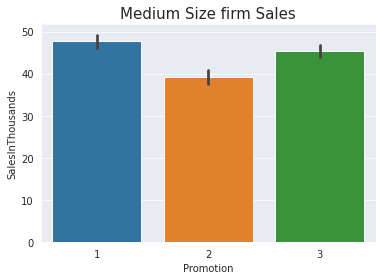

In [84]:
sns.barplot(med_sales['Promotion'],med_sales['SalesInThousands'])
plt.title("Medium Size firm Sales",fontsize=15)

Text(0.5, 1.0, 'large Size firm Sales')

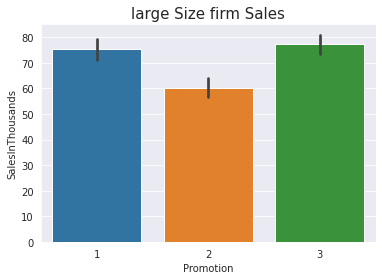

In [85]:
sns.barplot(lar_sales['Promotion'],lar_sales['SalesInThousands'])
plt.title("large Size firm Sales",fontsize=15)

From the above graph , we find out there is promotion_2 performs least of three.

While there remains doubt in case of promotion_1 and promotion_3. To get more evidence we will test it through the hypothesis test:

Ho : THere is no difference between salesinthoushand between promotion_1 and promotion_3.

Ha: There is a significance difference between sales_in_thousand between promotion_1 and promotion_3.



In [86]:
# for small size
res = ttest_ind(small_sales[small_sales['Promotion']==1]['SalesInThousands'],small_sales[small_sales['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 for small size firms".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 for small size firms".format(p_value)  )

P-value is 0.6810867067433423,hence there is no significant difference in sales for promotion 1 and promition 3 for small size firms


In [87]:
# for large size
res = ttest_ind(lar_sales[lar_sales['Promotion']==1]['SalesInThousands'],lar_sales[lar_sales['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 for large size firms".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 for large size firms".format(p_value)  )

P-value is 0.5063120169025387,hence there is no significant difference in sales for promotion 1 and promition 3 for large size firms


From the above, we find the promotion 2 works worst for all size of markets. While there appears to be no difference in average sales from promotion 1 and promotion 3.

Now,we will dive further, like week wise promotion impact on sales.


## 2. How promotion affects the market based on week, that is which promotion works based in each week.



Ho : THere is no difference between salesinthoushand between promotion_1 and promotion_3 across weeks.

Ha: There is a significance difference between sales_in_thousand between promotion_1 and promotion_3 across weeks.




In [88]:
df.columns

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands', 'rand1or0'],
      dtype='object')

In [89]:
# equal number of observations for each week
df['week'].value_counts()


1    137
2    137
3    137
4    137
Name: week, dtype: int64

In [90]:
# division based on week
# size wise 
first_sales = df[df['week']==1][['SalesInThousands','Promotion']]
sec_sales = df[df['week']==2][['SalesInThousands','Promotion']]
third_sales  = df[df['week']==3][['SalesInThousands','Promotion']]
four_sales = df[df['week']==4][['SalesInThousands','Promotion']]

Text(0.5, 1.0, 'Sales in first week')

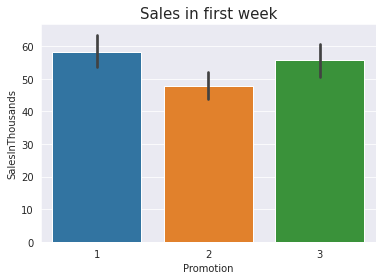

In [91]:
# first sales average sales
sns.barplot(first_sales['Promotion'],first_sales['SalesInThousands'])
plt.title("Sales in first week",fontsize=15)

Text(0.5, 1.0, 'Sales in second week')

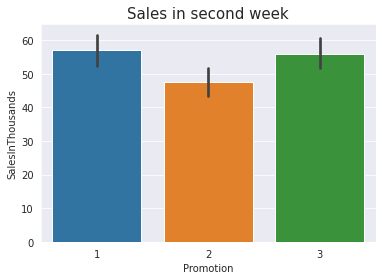

In [92]:
# second week sales
sns.barplot(sec_sales['Promotion'],sec_sales['SalesInThousands'])
plt.title("Sales in second week",fontsize=15)

Text(0.5, 1.0, 'Sales in third week')

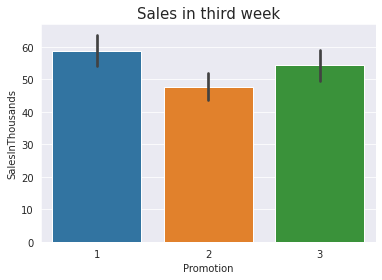

In [93]:
# third week sales
sns.barplot(third_sales['Promotion'],third_sales['SalesInThousands'])
plt.title("Sales in third week",fontsize=15)

Text(0.5, 1.0, 'Sales in fourth week')

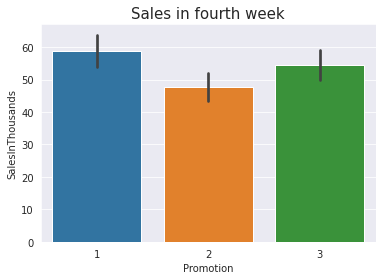

In [94]:
# fourth week sales
sns.barplot(third_sales['Promotion'],third_sales['SalesInThousands'])
plt.title("Sales in fourth week",fontsize=15)

In [95]:
# for first week
res = ttest_ind(first_sales[first_sales['Promotion']==1]['SalesInThousands'],first_sales[first_sales['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 for first_week firms".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 for first_week firms".format(p_value)  )

P-value is 0.5050662633693142,hence there is no significant difference in sales for promotion 1 and promition 3 for first_week firms


In [96]:
# for second week
res = ttest_ind(sec_sales[sec_sales['Promotion']==1]['SalesInThousands'],sec_sales[sec_sales['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 for second week".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 for second week".format(p_value)  )

P-value is 0.7733797603891037,hence there is no significant difference in sales for promotion 1 and promition 3 for second week


In [97]:
# for third week
res = ttest_ind(third_sales[third_sales['Promotion']==1]['SalesInThousands'],third_sales[third_sales['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 for third week".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 for third week".format(p_value)  )

P-value is 0.21937276089599606,hence there is no significant difference in sales for promotion 1 and promition 3 for third week


In [98]:
# for fourth wek
res = ttest_ind(four_sales[four_sales['Promotion']==1]['SalesInThousands'],four_sales[four_sales['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 for small size firms".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 for small size firms".format(p_value)  )

P-value is 0.3837511632994779,hence there is no significant difference in sales for promotion 1 and promition 3 for small size firms


Based on above analysis, we found out that promotion_2 does not work througout all weeks. Rather, there was a stiff competition between promotion_1 and promotion_3 throughout these weeks. On basis of numbers, we can say but promotion_1 has a higher average sales than promotion_3 (but this difference was not too much to be called significant difference).

##  How promotion impacts the sales based on age of store?

Now, we will see the impact of promotion based on the age of store. That is do we have more sales with old firm  or with new firms?


In [99]:
# distribution of age store
df['AgeOfStore'].value_counts()

1     80
4     44
5     44
7     40
8     40
6     36
3     32
9     28
10    24
12    24
19    20
13    20
2     20
11    16
14    12
24    12
22    12
15     8
23     8
18     8
28     4
25     4
27     4
17     4
20     4
Name: AgeOfStore, dtype: int64

Text(0.5, 1.0, 'Distribution of Age of store')

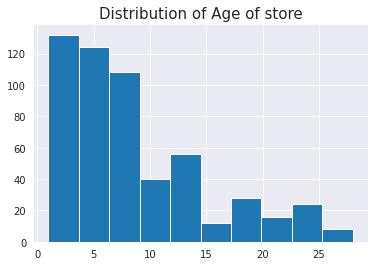

In [100]:
# using histplot
df['AgeOfStore'].hist()
plt.title("Distribution of Age of store",fontsize=15)

In [101]:
# describe about the age of store
df['AgeOfStore'].describe()

count    548.000000
mean       8.503650
std        6.638345
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       28.000000
Name: AgeOfStore, dtype: float64

From the above, we can see that there are more number of firms that are new.  (mainly below 10 years)

Let us divide the firms based on the age into new and old. The firm which is less than or equal to 7 years of age (using median) can be classified as new one and ones which is more than 7 years can be classified as old.

In [102]:
# new and old

def old_new(x):
  if x<=7:
    return "new"
  else:
    return "old"  

In [103]:
# using this old_new function using map method
df['old_new'] = df['AgeOfStore'].map(old_new)

Text(0.5, 1.0, 'Sales for firms')

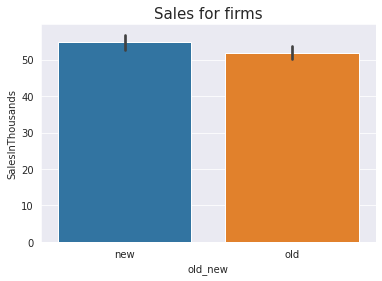

In [104]:
# showing average values of sales for each category of firm
sns.barplot(df['old_new'],df['SalesInThousands'])
plt.title("Sales for firms",fontsize=15)

Text(0.5, 1.0, 'sales for firms promotion wise')

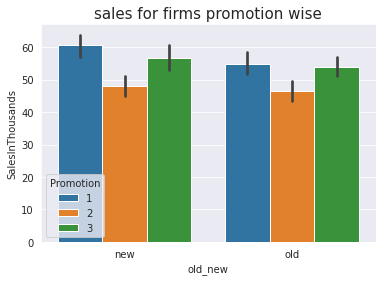

In [105]:
# see this with respct to promotion
sns.barplot(x='old_new',y= 'SalesInThousands',hue='Promotion',data =df)
plt.title("sales for firms promotion wise",fontsize=15)

The average sales for both old and new is higher for new firms (slightly).

Promotion _1 works best for new firms, while in case of old firms, there is indifference between promotion_1 and promotion_2.


Let's test this with the help of hypothesis testing


Ho: There is no significant difference between sales for new and old firms across promotions

Ha: There is a significant difference between sales for new and old firms across promotion.





In [106]:
# division based on age 
old_firm = df[df['old_new']=='old'][['SalesInThousands','Promotion']]
new_firm = df[df['old_new']=='new'][['SalesInThousands','Promotion']]


In [107]:
# for old_firm
res = ttest_ind(old_firm[old_firm['Promotion']==1]['SalesInThousands'],old_firm[old_firm['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 for old firms".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 for  old firms".format(p_value)  )

P-value is 0.675945371752634,hence there is no significant difference in sales for promotion 1 and promition 3 for  old firms


In [108]:
# for new_firm
res = ttest_ind(new_firm[new_firm['Promotion']==1]['SalesInThousands'],new_firm[new_firm['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 for new firms".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 for new firms".format(p_value)  )

P-value is 0.1522764200852886,hence there is no significant difference in sales for promotion 1 and promition 3 for new firms


Although  both new and old firms are earning more in promotion 1 compared to promotion_3, yet there are no conclusive evidence to say that the average sales are more for both firms in case of promotion_1 than promotion_3.

## 4.  which promotion performs well over others when we compare it over location wise.

Now, we will first explore the location_id of the dataset to obtain any insights and then, based on it , we will conduct our test. Here, location_id is an important factor as usually firm's sales are decided by its location.

In [109]:
# describe about location_id
df['LocationID'].describe()

count    548.000000
mean     479.656934
std      287.973679
min        1.000000
25%      216.000000
50%      504.000000
75%      708.000000
max      920.000000
Name: LocationID, dtype: float64

In [110]:
# value distribution
df['LocationID'].value_counts()

1      4
615    4
609    4
610    4
611    4
      ..
222    4
221    4
220    4
219    4
920    4
Name: LocationID, Length: 137, dtype: int64

Text(0.5, 1.0, 'Distribution of location_id')

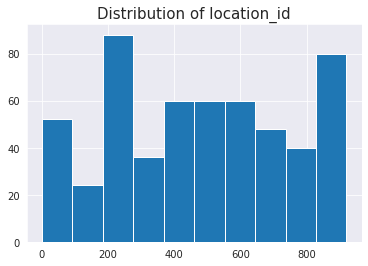

In [111]:
# histogram
df['LocationID'].hist()
plt.title("Distribution of location_id",fontsize=15)

 The firms have location id vary from 0 to 1000.
Let us divide the location_id into three categories: 0-300,300-600 and 600 and above.

In [112]:
# defining function for it
def cat_loc(x):
  if x<=300:
    return 1
  elif x<600:
    return 2
  else:
    return 3    

In [113]:
# using map function to convert and create a new column
df['cat_loc'] = df['LocationID'].map(cat_loc)

Text(0.5, 1.0, 'Sales over location')

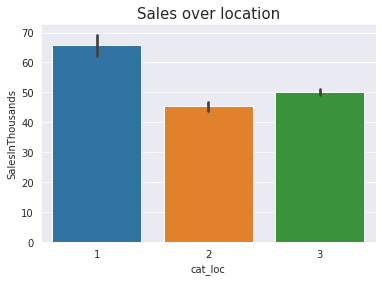

In [114]:
# sales based on this new column
sns.barplot(df['cat_loc'],df['SalesInThousands'])
plt.title("Sales over location",fontsize=15)

Text(0.5, 1.0, 'Sales over location , promotion wise')

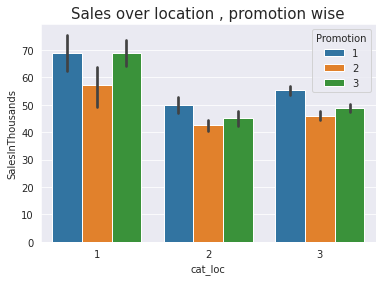

In [115]:
# sales distribution with promtion wise
sns.barplot(df['cat_loc'],df['SalesInThousands'],hue ='Promotion',data=df)
plt.title("Sales over location , promotion wise",fontsize=15)

The promotion_2 performs worst for all location categories. Whereas, promotion 1 performs best.

Let's test this with the help of hypothesis testing


Ho: There is no significant difference between sales for firms located in different areas across promotion.

Ha: There is a significant difference between sales for firms located in different areas across promotion.

In [116]:
# division based on location
loc_1 = df[df['cat_loc']==1][['SalesInThousands','Promotion']]
loc_2 = df[df['cat_loc']==2][['SalesInThousands','Promotion']]
loc_3 = df[df['cat_loc']==3][['SalesInThousands','Promotion']]

In [117]:
# for location_1
res = ttest_ind(loc_1[loc_1['Promotion']==1]['SalesInThousands'],loc_1[loc_1['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 for location 1".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 for location 1".format(p_value)  )

P-value is 0.9835672251742894,hence there is no significant difference in sales for promotion 1 and promition 3 for location 1


In [118]:
# for location_1
res = ttest_ind(loc_1[loc_1['Promotion']==1]['SalesInThousands'],loc_1[loc_1['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 in location 1".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 in location 1".format(p_value)  )

P-value is 0.9835672251742894,hence there is no significant difference in sales for promotion 1 and promition 3 in location 1


In [119]:
# for location_2
res = ttest_ind(loc_2[loc_2['Promotion']==1]['SalesInThousands'],loc_2[loc_2['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 in location 2".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 in location 1".format(p_value)  )

P-value is 0.02635446428968791, so there is a difference in sales for promotion 1 and promotion 3 in location 2


In [120]:
# for location_3
res = ttest_ind(loc_3[loc_3['Promotion']==1]['SalesInThousands'],loc_3[loc_3['Promotion']==3]['SalesInThousands'])
t_stat, p_value = res[0],res[1]
if p_value < 0.05:
  print("P-value is {}, so there is a difference in sales for promotion 1 and promotion 3 in location 3".format(p_value))
else:
  print("P-value is {},hence there is no significant difference in sales for promotion 1 and promition 3 in location 3".format(p_value)  )

P-value is 5.158791243907752e-09, so there is a difference in sales for promotion 1 and promotion 3 in location 3


From the above, we can see the results shown by the barplot are reiterated by the hypothesis tests. The firms located in location_1 or location_3 are enjoying more average sales in case of promotion_1 compared to promotion_3.

#  Conclusion:

Based on the above analysis, we have found the following insights:

* The promotion_2 yields least amount of benefits(or sales on average) to the firms irrespective of location, age, week, or size.

* It was found that promotion_1 and promotion_3 have been close on their impact on sales ,although promotion_1 generated a higher average sales but it was only marginal,  when compared on the basis of marketsize, week, age of store. The same was being assured from the evidence provided by A/B tests that shows lack of a significant difference in sales for marketsize, week, and age.


* On the contrary, there was an outlier  in case of location where promotion_1 generated the relatively higher average sales to the firms.



Hence, the firm can make use of either promotion_1 or promotion_3. Since, promotion_1 performs  significantly better in case of location and it has a higher average sales in case of age , weeek and age, **promotion_1 would help in optimizing the business revenue.**
